In [3]:
import os
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
from gapminderautomation as calculate_mean_over_time
%matplotlib inline

In [27]:
status = True

file = os.path.expanduser("~/Downloads/gapminder_cleaned.csv")

try:
    df = pd.read_csv(file)

except FileNotFoundError:
    file = input("File not found. Try another path for the file: ")
    
df.head()

,year,pop,lifeexp,gdppercap,country,continent
0,1952,8425333,28.801,779.445314,afghanistan,asia
1,1957,9240934,30.332,820.853030,afghanistan,asia
2,1962,10267083,31.997,853.100710,afghanistan,asia
3,1967,11537966,34.020,836.197138,afghanistan,asia
4,1972,13079460,36.088,739.981106,afghanistan,asia


In [34]:
df

,year,pop,lifeexp,gdppercap,country,continent
0,1952,8425333,28.801,779.445314,afghanistan,asia
1,1957,9240934,30.332,820.853030,afghanistan,asia
2,1962,10267083,31.997,853.100710,afghanistan,asia
3,1967,11537966,34.020,836.197138,afghanistan,asia
4,1972,13079460,36.088,739.981106,afghanistan,asia
5,1977,14880372,38.438,786.113360,afghanistan,asia
6,1982,12881816,39.854,978.011439,afghanistan,asia
7,1987,13867957,40.822,852.395945,afghanistan,asia
8,1992,16317921,41.674,649.341395,afghanistan,asia
9,1997,22227415,41.763,635.341351,afghanistan,asia


In [54]:
asia_data = df['continent']=='asia'
df_asia = df[asia_data]
df_asia

,year,pop,lifeexp,gdppercap,country,continent
0,1952,8425333,28.801,779.445314,afghanistan,asia
1,1957,9240934,30.332,820.853030,afghanistan,asia
2,1962,10267083,31.997,853.100710,afghanistan,asia
3,1967,11537966,34.020,836.197138,afghanistan,asia
4,1972,13079460,36.088,739.981106,afghanistan,asia
5,1977,14880372,38.438,786.113360,afghanistan,asia
6,1982,12881816,39.854,978.011439,afghanistan,asia
7,1987,13867957,40.822,852.395945,afghanistan,asia
8,1992,16317921,41.674,649.341395,afghanistan,asia
9,1997,22227415,41.763,635.341351,afghanistan,asia


In [57]:
year_data = df_asia['year'] ==2002
df_2002 = df_asia[year_data]
df_2002

,year,pop,lifeexp,gdppercap,country,continent
10,2002,25268405,42.129,726.734055,afghanistan,asia
94,2002,656397,74.795,23403.559270,bahrain,asia
106,2002,135656790,62.013,1136.390430,bangladesh,asia
226,2002,12926707,56.752,896.226015,cambodia,asia
298,2002,1280400000,72.028,3119.280896,china,asia
670,2002,6762476,81.495,30209.015160,"hong kong, china",asia
706,2002,1034172547,62.879,1746.769454,india,asia
718,2002,211060000,68.588,2873.912870,indonesia,asia
730,2002,66907826,69.451,9240.761975,iran,asia
742,2002,24001816,57.046,4390.717312,iraq,asia


In [59]:
value = np.mean(df_2002['lifeexp'])
result =[]
result.append(('asia','2002',value))
result

[('asia', '2002', 69.23387878787878)]

In [86]:
years = df_asia['year'].unique()
result =[]

for i in years:
    year_data = df_asia['year'] == i
    df_year = df_asia[year_data]
    value = np.mean(df_year['lifeexp'])
    result.append(('asia',i,value))

summary = pd.DataFrame(result,columns=['continent','year','lifeexp'])

In [87]:
summary

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


Input category: pop


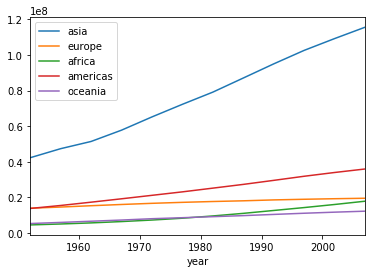

In [135]:
def calculate_mean_over_time(dataframe,column,continent_name,function):
    '''Calculate values over time in years.
    
    Arguments:
    dataframe: main dataframe we are interested in
    column: category/label in dataframe
    continent_name: self expalantory
    function: mean, median, etc
    
    Returns: dataframe of continent, year, and value of category we are interested in.'''
    
    continent_data = dataframe['continent']==continent_name
    df_continent = df[continent_data]

    years = df_continent['year'].unique()
    result =[]

    for i in years:
        year_data = df_continent['year'] == i
        df_year = df_continent[year_data]
        value = function(df_year[column])
        result.append((continent_name,i,value))

    summary = pd.DataFrame(result,columns=['continent','year',column])
    return summary


def calculate_median_over_time(continent_name):
    continent_data = df['continent']==continent_name
    df_continent = df[continent_data]

    years = df_continent['year'].unique()
    result =[]

    for i in years:
        year_data = df_continent['year'] == i
        df_year = df_continent[year_data]
        value = np.median(df_year['lifeexp'])
        result.append((continent_name,i,value))

    summary = pd.DataFrame(result,columns=['continent','year','lifeexp median'])
    summary.plot.line('year','lifeexp median')    
    
def main():
    fig, ax = plt.subplots()
    category = input("Input category: ")
    continents = df['continent'].unique()
    for i in continents:
        output = calculate_mean_over_time(df,category,i,np.mean)
        output.plot.line('year',category,ax=ax,label=i)
    
main()

In [131]:
help(calculate_mean_over_time)

Help on function calculate_mean_over_time in module __main__:

calculate_mean_over_time(dataframe, column, continent_name, function)
    Calculate values over time in years.
    
    Arguments:
    dataframe: main dataframe we are interested in
    column: category/label in dataframe
    continent_name: self expalantory
    function: mean, median, etc



array(['asia', 'europe', 'africa', 'americas', 'oceania'], dtype=object)